<a href="https://colab.research.google.com/github/yoojungsun0/uci-psych203/blob/main/PSYCH203B_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load the data into your software package and select sessions 364 and above.


In [2]:
import pandas as pd
from urllib.request import Request, urlopen
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/PerceptionCognitionLab/data2/master/out/morph1.dat"
url_request  = Request(url)
data = urlopen(url_request )
df = pd.read_table(data, header=0, sep=' ')
df.head(5)

,datID,sessionID,block,trial,background,target,forePeriod,resp,rt
0,1,360,0,0,0,1,32,0,1.262
1,2,360,0,1,0,8,31,0,0.934
2,3,360,0,2,0,9,35,1,0.604
3,4,360,0,3,0,0,31,0,0.617
4,5,360,0,4,0,7,31,0,0.486


In [3]:
df.tail(5)

,datID,sessionID,block,trial,background,target,forePeriod,resp,rt
5448,5450,376,6,11,1,7,34,1,0.283
5449,5451,376,6,12,1,6,31,1,0.310
5450,5452,376,6,13,0,3,35,1,0.253
5451,5453,376,6,14,1,1,32,0,0.167
5452,5454,376,6,15,1,5,37,1,0.258


In [6]:
# List of all sessions
df['sessionID'].unique()

array([360, 361, 362, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373,
       376])

In [10]:
# List of session 364 and above
sessionID = df['sessionID'].unique()[3:]
sessionID

array([364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 376])

In [11]:
# Number of participants that we will analyze for this assignment
len(sessionID)

11

2. As a check, we expect all participants to react appropriately to
the target. As the target level increases from more H-like (level
0) to more A-like (level 9), the probablity of an A response
(coded 1) should increase. Visualize the data for each
participant (each participant is a session) to see if all pass the
check. One does not. Make a graph (or several graphs) to
show the check and who passes. Based on this analysis, please
exclude session 365 for the remainder of this exam.

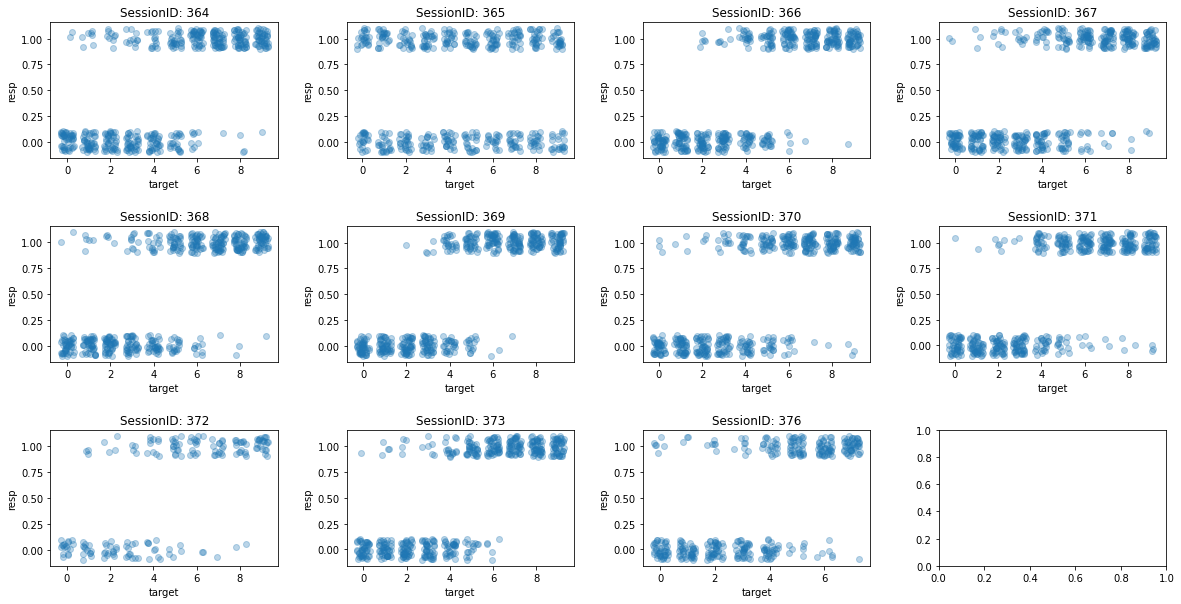

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3,4, figsize=(20,10), facecolor='w', edgecolor='k')
# axs = axs.ravel()
# for i,session in enumerate(sessionID):
for i, ax in zip(range(len(sessionID)), axs.flat):
  curr = df.loc[df['sessionID'] == sessionID[i]]
  # x = np.asarray(curr['target'])
  # y = np.asarray(curr['resp'])
  # X = x.reshape(-1,1)
  # plt.figure()
  # plt.title('SessionID: {}'.format(session))
  # plt.xlabel('Target')
  # plt.ylabel('Resp')
  sns.regplot(x='target', 
              y='resp', 
              data=curr,
              fit_reg=False, # do not fit a regression line
              x_jitter=0.3, # could also dynamically set this with range of data
              y_jitter=0.1,
              scatter_kws={'alpha':0.3}, 
              ax=ax
              ) # set transparency to 50%
  ax.set_title('SessionID: {}'.format(sessionID[i]))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
# plt.show()